This tutorial deals with __reading a SEG-Y revision 2__ file. Please make sure you have run tutorial #4 to create the required SEG-Y file.

Let's start by importing some packages (including the seisio package itself) and setting up the logging config.

In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(1, '../')

In [2]:
import seisio

In [3]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s', force=True)
log = logging.getLogger("main")

Let's create the seisio object. Under ideal circumstances, the module can determine all relevant parameters automatically to read the file correctly:

In [4]:
file = "data/SEGYrev2.sgy"

sio = seisio.input(file)

INFO: Input file: data/SEGYrev2.sgy
INFO: SEG-Y textual file header encoding looks to be 'EBCDIC' (best guess).
INFO: Input file endianess looks to be '>' (best guess).
INFO: SEG-Y revision (according to binary header): 2.0
INFO: Data sample format: 4-byte IEEE floating-point.
INFO: SEG-Y fixed-trace-length flag is set in binary header.
INFO: SEG-Y ext. textual record 1 encoding looks to be 'EBCDIC' (best guess).
INFO: SEG-Y ext. textual record 2 encoding looks to be 'EBCDIC' (best guess).
INFO: Number of additional textual header records: 2.
INFO: Number of trailer stanza records: 0.
INFO: SEG-Y trace header extension 1 is not present.
INFO: Number of user-defined trace headers: 0
INFO: Byte offset of first trace relative to start of file: 10000 bytes.
INFO: Number of samples per data trace: 80001.
INFO: Sampling interval: 0.1 (unit as per SEG-Y standard).
INFO: Number of data traces in file: 10.
INFO: Delay (on first trace): 0 (unit as per SEG-Y standard).


In [5]:
nt = sio.ntraces
ns = sio.nsamples
dt = sio.vsi*1e-6
t = np.arange(0, (ns-1)*dt+dt/2, dt)
log.info("nt=%d, ns=%d, dt=%e", nt, ns, dt)

INFO: nt=10, ns=80001, dt=1.000000e-07


Let's get and log the binary file header:

In [6]:
binhead = sio.log_binhead()

INFO: SEG-Y binary file header:
+----------+-----------------+----------------------------------------------------------+
|          |           value | description                                              |
|----------+-----------------+----------------------------------------------------------|
| job      |     1           | Job identification number                                |
| line     |    42           | Line number                                              |
| nt       |    10           | Number of traces per ensemble                            |
| format   |     5           | Data sample format code                                  |
| ens      | 80001           | Extended number of samples per data trace                |
| edt      |     0.1         | Extended sample interval (IEEE)                          |
| iconst   |     1.69091e+07 | The integer constant 16909060_10 (01020304_16)           |
| segymaj  |     2           | SEG-Y major format revision number   

Let's get and log the primary textual file header:

In [7]:
txthead = sio.log_txthead()

INFO: SEG-Y textual file header:
INFO: -------- BEGIN --------
C01 This is an exemplary textual file header.                                   
C02                                                                             
C03                                                                             
C04                                                                             
C05                                                                             
C06                                                                             
C07                                                                             
C08                                                                             
C09                                                                             
C10                                                                             
C11                                                                             
C12                                           

Let's get the additional textual header records:

In [8]:
records = sio.records
log.info("%s", records[0])

INFO: (( OGP: P1/11 Data Geographic Extent ))                                         ...                                                                             ...                                                                             ...                                                                             ...                                                                             ...                                                                             ...                                                                             ...                                                                             ...                                                                             ...                                                                             ...                                                                             ...                                                                             ...                               

In [9]:
log.info("%s", records[1])

INFO: (( Company XYZ: User-defined textual header ))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Now read the data set and plot it:

In [10]:
dataset = sio.read_all_traces()

INFO: Reading entire file (10 traces) from disk...
INFO: Reading all traces took 0.001 seconds.


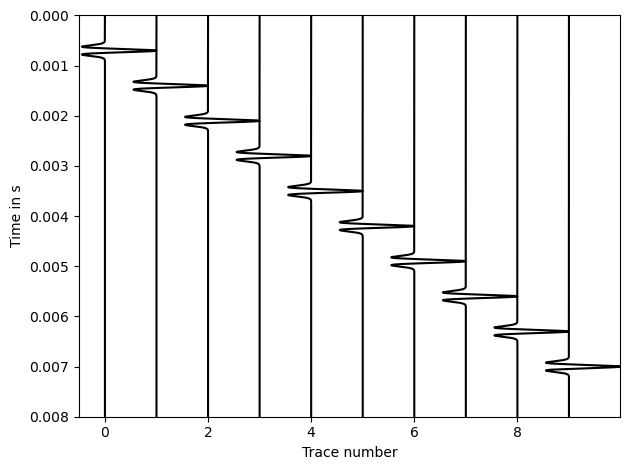

In [11]:
fig, ax = plt.subplots(1, 1)
for i in range(nt):
    ax.plot(i+dataset["data"][i, :], t, 'k-')
ax.set_xlabel("Trace number")
ax.set_ylabel("Time in s")
ax.set_xlim(-0.5, 9.99)
ax.set_ylim(t[-1], t[0])
plt.tight_layout()
plt.show()

Note: We provide another Python package called __seisplot__ for displaying seismic data in a convenient way.